In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [22]:
df=pd.read_csv('Social_Network_Ads.csv')

In [23]:
df.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [24]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [25]:
df.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [26]:
df['Gender']=df['Gender'].factorize()[0]

In [27]:
df.dtypes

User ID            int64
Gender             int64
Age                int64
EstimatedSalary    int64
Purchased          int64
dtype: object

In [28]:
df['Gender']=df['Gender'].astype(float)

In [29]:
X=df.iloc[:,[3,4]].values

In [30]:
y=df['Purchased']

c:\Users\sahil\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


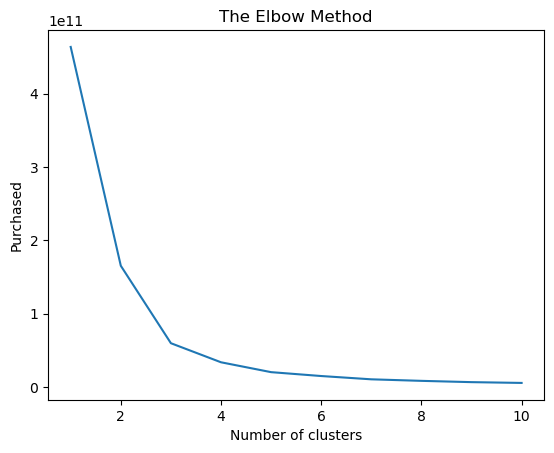

In [31]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Purchased')
plt.show()

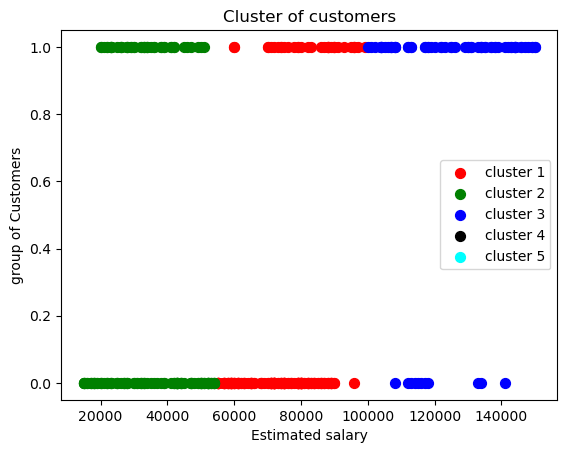

In [32]:
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=42)
y_kmeans=kmeans.fit_predict(X)

plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],s=50,c='red',label='cluster 1')
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],s=50,c='green',label='cluster 2')
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],s=50,c='blue',label='cluster 3')
plt.scatter(X[y_kmeans==3,0],X[y_kmeans==3,1],s=50,c='black',label='cluster 4')
plt.scatter(X[y_kmeans==4,0],X[y_kmeans==4,1],s=50,c='cyan',label='cluster 5')
#plt.scatter(kmeans.cluster_centers_[:], kmeans.cluster_centers_[:], s = 100, c = 'yellow', label = 'Centroids')
plt.title('Cluster of customers')
plt.xlabel('Estimated salary')
plt.ylabel('group of Customers')
plt.legend()
plt.show()

In [33]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch


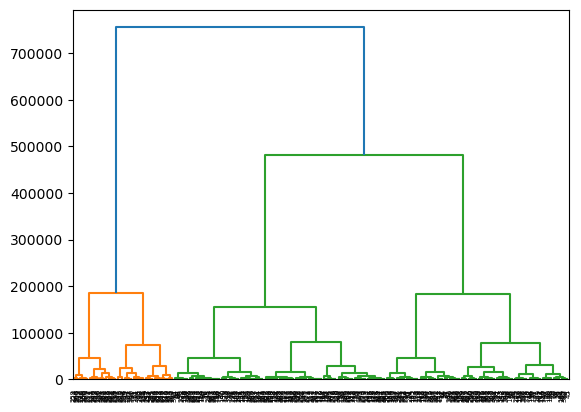

In [34]:
dendogram=sch.dendrogram(sch.linkage(X,method='ward'))


In [35]:
model=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
model.fit(X)
labels=model.labels_

In [36]:
labels

array([2, 2, 4, 0, 0, 0, 0, 3, 2, 0, 0, 4, 0, 2, 0, 0, 2, 2, 2, 2, 2, 4,
       4, 2, 2, 2, 2, 2, 4, 2, 0, 3, 2, 4, 0, 2, 2, 4, 0, 2, 2, 4, 1, 2,
       0, 2, 0, 4, 3, 0, 2, 4, 0, 2, 0, 4, 4, 0, 2, 1, 2, 0, 0, 1, 0, 0,
       2, 0, 0, 0, 0, 2, 2, 1, 2, 1, 4, 2, 0, 2, 0, 4, 4, 0, 0, 1, 4, 0,
       0, 4, 0, 1, 2, 2, 0, 4, 2, 1, 0, 2, 0, 0, 0, 3, 2, 0, 2, 0, 0, 0,
       0, 0, 0, 4, 0, 0, 0, 4, 0, 0, 0, 0, 0, 4, 4, 0, 0, 2, 2, 0, 0, 2,
       0, 0, 4, 0, 0, 1, 0, 2, 0, 0, 0, 0, 2, 0, 1, 2, 0, 0, 2, 4, 0, 4,
       4, 2, 0, 0, 2, 3, 1, 0, 2, 2, 0, 0, 4, 0, 3, 4, 0, 1, 1, 4, 0, 2,
       4, 2, 2, 2, 2, 0, 1, 4, 0, 0, 0, 4, 0, 2, 0, 2, 4, 0, 0, 4, 0, 2,
       0, 2, 2, 0, 3, 0, 1, 4, 3, 1, 3, 2, 1, 3, 4, 0, 4, 1, 0, 0, 1, 3,
       0, 0, 3, 1, 0, 4, 1, 3, 0, 0, 3, 4, 1, 0, 1, 0, 0, 0, 0, 3, 3, 0,
       0, 1, 0, 3, 4, 1, 4, 1, 2, 4, 3, 3, 4, 0, 0, 0, 1, 3, 0, 3, 1, 0,
       0, 1, 0, 0, 3, 0, 3, 0, 4, 1, 2, 0, 0, 0, 2, 2, 0, 0, 0, 2, 3, 0,
       0, 3, 0, 0, 3, 0, 2, 0, 0, 0, 0, 1, 0, 1, 2,

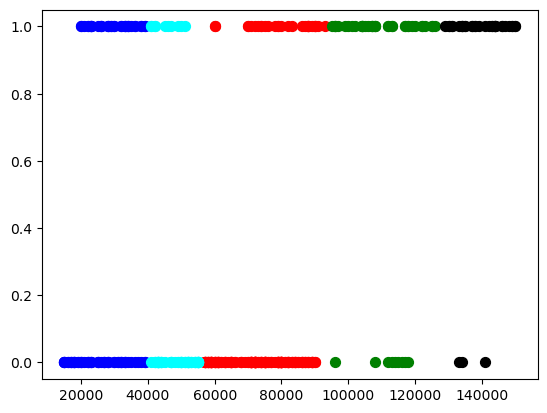

In [37]:
plt.scatter(X[labels==0,0],X[labels==0,1],s=50,marker='o',color='red')
plt.scatter(X[labels==1,0],X[labels==1,1],s=50,marker='o',color='green')
plt.scatter(X[labels==2,0],X[labels==2,1],s=50,marker='o',color='blue')
plt.scatter(X[labels==3,0],X[labels==3,1],s=50,marker='o',color='black')
plt.scatter(X[labels==4,0],X[labels==4,1],s=50,marker='o',color='cyan')